## Final Project Submission

Please fill out:
* Student name: Stephen Ndirangu
       
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Everlyn Asiko
* Blog post URL:


# King's County Home Sales dataset analysis

# Project overview

## Business problem

G-One Limited is a real estate agency that helps homeowners buy and/or sell homes. Our client, a family of three has approached us to help them settle on a home that will have the highest resell value. Our intention is to help the family get insight into the features that will most contribute to the highest or best sales of the housing units. To achieve this, we will analyse the King's County home sales dataset.

## Data understanding

The dataset was obtained from Kings County housing dataset contained in a CSV file kc_house_data.csv. The file contains information on over 21,000 housing units. The data is organized into a table with several columns containing different information about the houses.

The following are the columns contained in the dataset along with their descriptions:
* id - Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront
Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* view - Quality of view from house
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* condition - How good the overall condition of the house is. Related to maintenance of house.
See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g) for further explanation of each condition code
* grade - Overall grade of the house. Related to the construction and design of the house.
See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g) for further explanation of each building grade code
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Some of the challenges encountered during data preparation included the presence of missing values, outliers and placeholders.


## Data preparation

In [1]:
# importing the relevant libraries
import pandas as pd
import csv
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import gauss
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

%matplotlib inline

warnings.filterwarnings('ignore')


In [2]:
#importing and displaying the contents of the dataset
housing_data = pd.read_csv('data/kc_house_data.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#exploring the dataset to understand the data types and contents
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#checking the number of rows and columns
housing_data.shape

(21597, 21)

## Data cleaning

In [5]:
#checking for missing values in the dataset
housing_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#checking the proportion of missing values
housing_data.isna().sum()/len(housing_data)

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

### Dealing with missing values

We will first deal with the missing values in the waterfront, view and grade columns

In [7]:
#checking unique values in the waterfront column
housing_data['waterfront'].unique()

#checking the value counts
housing_data['waterfront'].value_counts()

#replacing the missing values in the waterfront column with the mode
housing_data['waterfront'] = housing_data['waterfront'].fillna('NO')

#checking the unique values after replacing missing values
housing_data['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [8]:
#checking the dataset after replacing missing values in waterfront column
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
#checking for unique values in the view column
housing_data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [10]:
#checking value counts
housing_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
#filling in the missing values in the housing data view column
housing_data['view'] = housing_data['view'].fillna('NONE')
housing_data['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [12]:
#checking the dataset after replacing the missing values in view
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
#checking the unique values for the year renovated column
housing_data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
#filling year renovated column with zeros for where no renovation has been done
housing_data['yr_renovated'] = housing_data['yr_renovated'].fillna(0)

#checking unique values after replacing missing values
housing_data['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
#checking for any missing values after replacing the identified missing values
perc = housing_data.isnull().sum()/len(housing_data)
perc

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [16]:
# Converting the 'Date' column to datetime format
housing_data['date'] = pd.to_datetime(housing_data['date'], format='%m/%d/%Y')

# Extracting the month and storing it in a new column
housing_data['Month'] = housing_data['date'].dt.month

housing_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,6
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NO,NONE,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,3


In [17]:
#checking sq_foot columns 
sqfeet = housing_data.loc[:,['sqft_living' , 'sqft_above' ,'sqft_basement']]
print(sqfeet)

       sqft_living  sqft_above sqft_basement
0             1180        1180           0.0
1             2570        2170         400.0
2              770         770           0.0
3             1960        1050         910.0
4             1680        1680           0.0
...            ...         ...           ...
21592         1530        1530           0.0
21593         2310        2310           0.0
21594         1020        1020           0.0
21595         1600        1600           0.0
21596         1020        1020           0.0

[21597 rows x 3 columns]


The values in "sqft_above" and "sqft_basement" columns appear to add up to the values in the "sqft_living" column. We drop those two columns along with other columns that we will not use in our analysis.

In [18]:
#Dropping columns
housing_data.drop(columns = ['sqft_above','sqft_basement','sqft_lot15','sqft_living15', 'zipcode', 'lat', 'long','id'],inplace=True)

#data columns summary
housing_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'Month'],
      dtype='object')

In [19]:
#checking the contents of the dataset after dealing with missing values and dropping ccolumns
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          21597 non-null  datetime64[ns]
 1   price         21597 non-null  float64       
 2   bedrooms      21597 non-null  int64         
 3   bathrooms     21597 non-null  float64       
 4   sqft_living   21597 non-null  int64         
 5   sqft_lot      21597 non-null  int64         
 6   floors        21597 non-null  float64       
 7   waterfront    21597 non-null  object        
 8   view          21597 non-null  object        
 9   condition     21597 non-null  object        
 10  grade         21597 non-null  object        
 11  yr_built      21597 non-null  int64         
 12  yr_renovated  21597 non-null  float64       
 13  Month         21597 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 2.3+ MB


In [20]:
#converting the year renovated column to '0' for rows without a renovation year and '1' for those with a renovation year
housing_data['Renovated'] = housing_data['yr_renovated'].apply(lambda x: 'yes' if x != 0 else 'no')

In [21]:
#concise data summary
housing_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.373200,0.926299,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,2080.321850,918.106125,370.0,1430.00,1910.00,2550.0,13540.0
sqft_lot,21597.0,15099.408760,41412.636876,520.0,5040.00,7618.00,10685.0,1651359.0
floors,21597.0,1.494096,0.539683,1.0,1.00,1.50,2.0,3.5
yr_built,21597.0,1970.999676,29.375234,1900.0,1951.00,1975.00,1997.0,2015.0
yr_renovated,21597.0,68.758207,364.037499,0.0,0.00,0.00,0.0,2015.0
Month,21597.0,6.573969,3.115061,1.0,4.00,6.00,9.0,12.0


In [22]:
#checking the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          21597 non-null  datetime64[ns]
 1   price         21597 non-null  float64       
 2   bedrooms      21597 non-null  int64         
 3   bathrooms     21597 non-null  float64       
 4   sqft_living   21597 non-null  int64         
 5   sqft_lot      21597 non-null  int64         
 6   floors        21597 non-null  float64       
 7   waterfront    21597 non-null  object        
 8   view          21597 non-null  object        
 9   condition     21597 non-null  object        
 10  grade         21597 non-null  object        
 11  yr_built      21597 non-null  int64         
 12  yr_renovated  21597 non-null  float64       
 13  Month         21597 non-null  int64         
 14  Renovated     21597 non-null  object        
dtypes: datetime64[ns](1), float64(4), in

## Data modelling

In [23]:
#making a copy of the dataset to be used for modeling
housing= housing_data.copy(deep=True)
housing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,Month,Renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1955,0.0,10,no
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,1951,1991.0,12,yes
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,1933,0.0,2,no
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1965,0.0,12,no
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1987,0.0,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,2009,0.0,5,no
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2014,0.0,2,no
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,2009,0.0,6,no
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,2004,0.0,1,no


In [24]:
#checking data correlation
housing.corr()["price"]

price           1.000000
bedrooms        0.308787
bathrooms       0.525906
sqft_living     0.701917
sqft_lot        0.089876
floors          0.256804
yr_built        0.053953
yr_renovated    0.117855
Month          -0.009928
Name: price, dtype: float64

<AxesSubplot:>

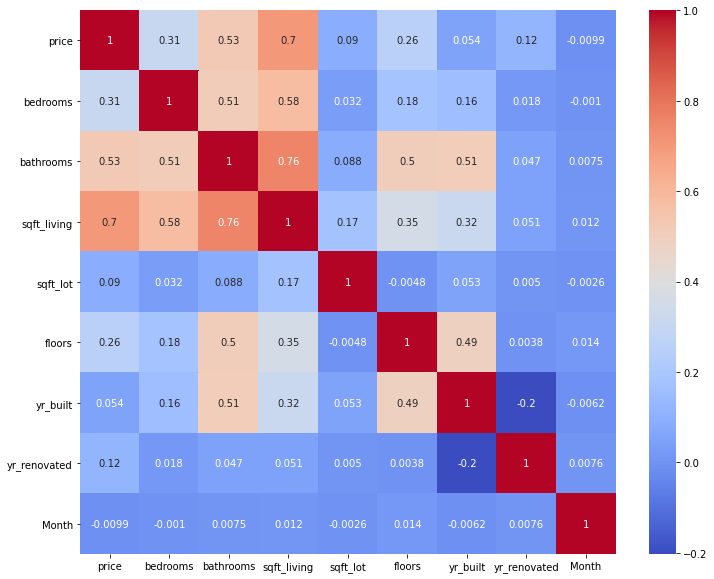

In [25]:
# Plotting correlation matrix
corr_matrix = housing.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [26]:
#checking for multicollinearity between the variables. Returns 'true' where multicollinearity exists and 'false' where it 
#doesn't
abs(housing.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,Month
price,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False
floors,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,True,False,False
yr_renovated,False,False,False,False,False,False,False,True,False
Month,False,False,False,False,False,False,False,False,True


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

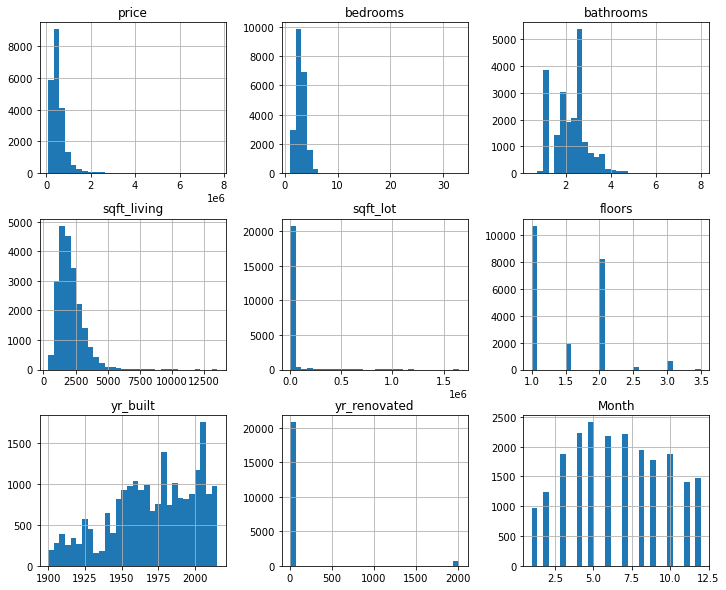

In [27]:
# Descriptive statistics of numeric columns
numeric_columns = housing.select_dtypes(include=['int64', 'float64'])
# Histograms of numeric columns
numeric_columns.hist(bins=30, figsize=(12, 10))

We can deduce from the histograms above that the dataset does not exhibit a normal distribution.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

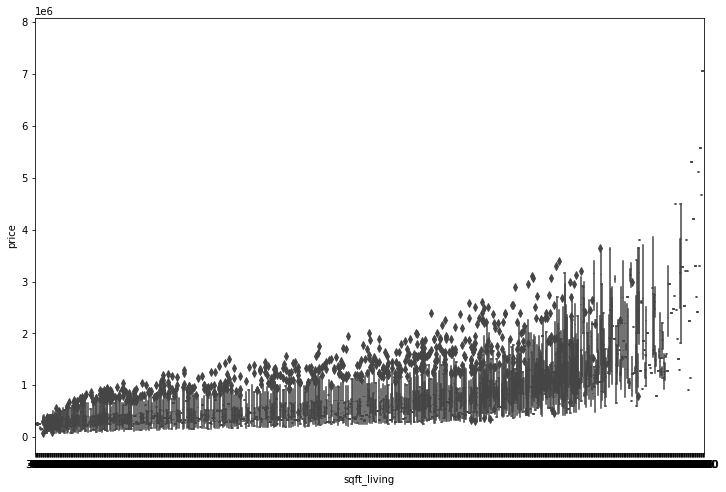

In [28]:
# Box plots of important features
plt.figure(figsize=(12, 8))
sns.boxplot(x='sqft_living', y='price', data=housing)


In [29]:
#changing the price variable into normally distributed data using log transformation
housing['price_log'] = np.log(housing['price'])

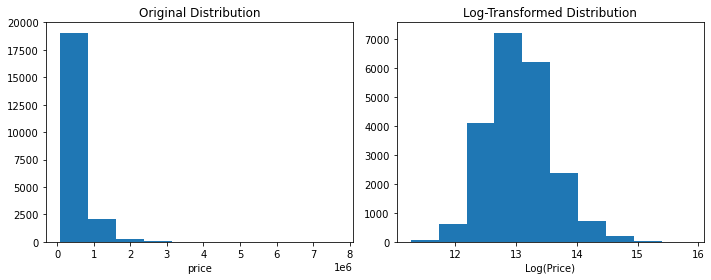

In [30]:
#plotting histograms to compare price variable before and after log transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(housing['price'], bins=10)
plt.title('Original Distribution')
plt.xlabel('price')

plt.subplot(1, 2, 2)
plt.hist(housing['price_log'], bins=10)
plt.title('Log-Transformed Distribution')
plt.xlabel('Log(Price)')

plt.tight_layout()
plt.show()

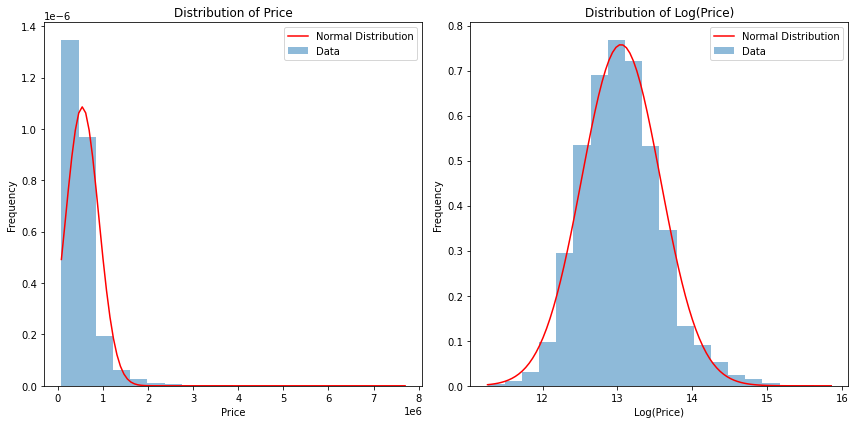

In [31]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(housing['price'], bins=20, density=True, alpha=0.5, label='Data')

# Fit a normal distribution to the data
params = stats.norm.fit(housing['price'])
mean, std = params

# Generate values for the normal distribution
x = np.linspace(housing['price'].min(), housing['price'].max(), 100)
pdf = stats.norm.pdf(x, mean, std)

# Plot the normal distribution
plt.plot(x, pdf, 'r-', label='Normal Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing['price_log'], bins=20, density=True, alpha=0.5, label='Data')

# Fit a normal distribution to the data
params = stats.norm.fit(housing['price_log'])
mean, std = params

# Generate values for the normal distribution
x = np.linspace(housing['price_log'].min(), housing['price_log'].max(), 100)
pdf = stats.norm.pdf(x, mean, std)

# Plot the normal distribution
plt.plot(x, pdf, 'r-', label='Normal Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Price)')
plt.legend()

plt.tight_layout()
plt.show()

Following the log transformation, the price variable appears more normal. Next we proceed to creating our linear models. We begin our regression by creating a baseline model that is a simple linear regression with the price log as the dependent variable and sqft_living as the independent variable.

## Baseline model

In [32]:
# Prepare y and X for modeling
y = housing['price_log']
X = housing[['sqft_living']]
housing_price_log_model = sm.OLS(y, sm.add_constant(X))
y_log_results = housing_price_log_model.fit()

print(y_log_results.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:33:11   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2188      0.006   1915.383      

The baseline model is statistically significant overall, with an F-statistic p-value well below 0.05. The model explains about 48% of the variance in price. The model's feature coefficient "sqft_living" is statistically significant with a p-value below 0.05.

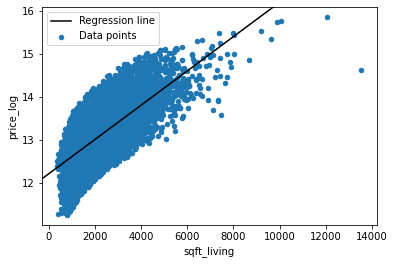

In [33]:
#plotting a simple regression line
fig, ax = plt.subplots()
housing.plot.scatter(x='sqft_living', y='price_log', label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=y_log_results, label="Regression line", ax=ax, color="black")
ax.legend()

In [34]:
#testing for linearity
# Fit the Linear Regression Model
from statsmodels.stats.api import linear_rainbow

# Perform the Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(y_log_results)

# Print the results
print("Rainbow Test - Statistic:", rainbow_statistic)
print("Rainbow Test - p-value:", rainbow_p_value)

Rainbow Test - Statistic: 0.9774213050674848
Rainbow Test - p-value: 0.8822865481367497


The rainbow test p-value of 0.88 is greater than 0.05 hence confirming the linearity of our model.

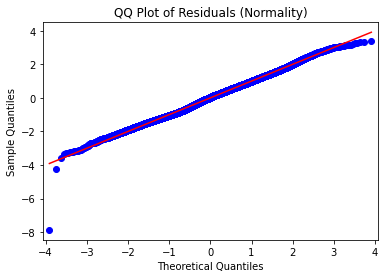

In [35]:
#testing for normality
residuals = y_log_results.resid
# Generate a QQ plot of the residuals
sm.qqplot(residuals, line='s', dist=stats.norm, fit=True)
plt.title('QQ Plot of Residuals (Normality)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [36]:
#testing for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(residuals, X)

# Print the results
print("Breusch-Pagan Test for Homoscedasticity:")
print("p-value:", p_value)

# Interpret the results
if p_value > 0.05:
    print("The residuals exhibit homoscedasticity.")
else:
    print("The residuals do not exhibit homoscedasticity.")

Breusch-Pagan Test for Homoscedasticity:
p-value: nan
The residuals do not exhibit homoscedasticity.


In [37]:
sm.graphics.abline_plot(model_results=y_log_results, label="Regression line", ax=ax, color="black")
ax.legend()

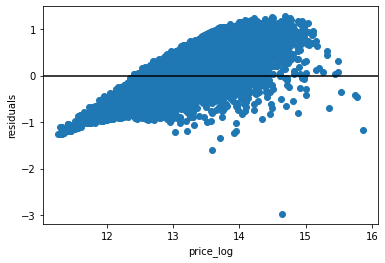

In [38]:
#plotting the residuals
fig, ax = plt.subplots()

ax.scatter(housing['price_log'], y_log_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price_log")
ax.set_ylabel("residuals");

## Second model

In our second model, we include 'bedrooms', 'bathrooms', 'sqft_lot','floors', and 'yr_built' as feature variables. We witness an improvement in our R-squared from approximately 48% to approximately 54%.

In [39]:
#modeling with additional independent variables
y = housing['price_log']
X2 = housing[['sqft_living','bedrooms', 'bathrooms', 'sqft_lot','floors','yr_built' ]]
housing_price_log_model = sm.OLS(y, sm.add_constant(X2))
y_log_results = housing_price_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4250.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:33:14   Log-Likelihood:                -8370.4
No. Observations:               21597   AIC:                         1.675e+04
Df Residuals:                   21590   BIC:                         1.681e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.5291      0.196    109.581      

The second model is statistically significant overall, with an F-statistic p-value well below 0.05. The model explains about 54% of the variance in price. The model's feature coefficients "sqft_living", 'bedrooms', 'bathrooms', 'sqft_lot','floors', and 'yr_built are also statistically significant with p-values below 0.05. However, we observe a negarive correlation between bedrooms, sqft_lot and yr_built, respectively, with the price.

In [40]:
#testing for linearity
# Fit the Linear Regression Model
from statsmodels.stats.api import linear_rainbow

# Perform the Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(y_log_results)

# Print the results
print("Rainbow Test - Statistic:", rainbow_statistic)
print("Rainbow Test - p-value:", rainbow_p_value)

Rainbow Test - Statistic: 0.9706175385064334
Rainbow Test - p-value: 0.9393353980285579


The rainbow test p-value of 0.93 is greater than 0.05 hence confirming the linearity of our model.

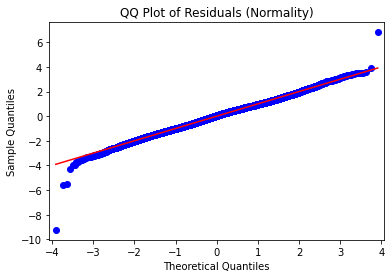

In [41]:
#testing for normality
residuals = y_log_results.resid
# Generate a QQ plot of the residuals
sm.qqplot(residuals, line='s', dist=stats.norm, fit=True)
plt.title('QQ Plot of Residuals (Normality)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

While there are a couple of places where the scatterplot diverges from the diagonal line, the points and the line are generally very close.

In [42]:
#testing for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
_, p_value, _, _ = het_breuschpagan(residuals, X)

# Print the results
print("Breusch-Pagan Test for Homoscedasticity:")
print("p-value:", p_value)

# Interpret the results
if p_value > 0.05:
    print("The residuals exhibit homoscedasticity.")
else:
    print("The residuals do not exhibit homoscedasticity.")

Breusch-Pagan Test for Homoscedasticity:
p-value: nan
The residuals do not exhibit homoscedasticity.


While this model meets the assumption of linearity, it does not meet the assumptions of normality and homoscedasticity.

## Final model

Building from the previous model, we convert the categorical variables "grade", "condition", "view", "waterfront" and "renovated" into continous variables and add them as features in our model.

In [43]:
y = housing['price_log']
X3 = housing[['sqft_living','bedrooms', 'bathrooms','waterfront', 'sqft_lot','floors','yr_built' ,'condition','grade','view','Renovated']]
X3 = pd.get_dummies(X3, columns=["grade",'condition','view','waterfront','Renovated'], drop_first=True) # origin is categorical
X3

,sqft_living,bedrooms,bathrooms,sqft_lot,floors,yr_built,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,condition_Fair,condition_Good,condition_Poor,condition_Very Good,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES,Renovated_yes
0,1180,3,1.00,5650,1.0,1955,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2570,3,2.25,7242,2.0,1951,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,770,2,1.00,10000,1.0,1933,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1960,4,3.00,5000,1.0,1965,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1680,3,2.00,8080,1.0,1987,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3,2.50,1131,3.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21593,2310,4,2.50,5813,2.0,2014,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21594,1020,2,0.75,1350,2.0,2009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,1600,3,2.50,2388,2.0,2004,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x3.columns

In [45]:
#modelling and checking regression results
housing_price_log_model = sm.OLS(y, sm.add_constant(X3))
y_log_results = housing_price_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1550.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:35:51   Log-Likelihood:                -5411.9
No. Observations:               21597   AIC:                         1.088e+04
Df Residuals:                   21570   BIC:                         1.109e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.4024    

In [46]:
modelresiduals = y_log_results.resid

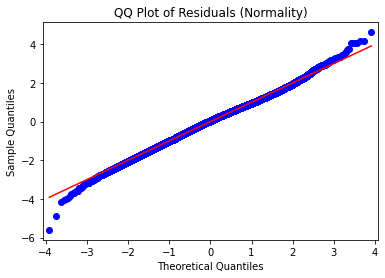

In [47]:
# Generate a QQ plot of the residuals
sm.qqplot(modelresiduals, line='s', dist=stats.norm, fit=True)
plt.title('QQ Plot of Residuals (Normality)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [49]:
_, p_value, _, _ = het_breuschpagan(modelresiduals, X3)

# Print the results
print("Breusch-Pagan Test for Homoscedasticity:")
print("p-value:", p_value)

# Interpret the results
if p_value > 0.05:
    print("The residuals exhibit homoscedasticity.")
else:
    print("The residuals do not exhibit homoscedasticity.")

Breusch-Pagan Test for Homoscedasticity:
p-value: 0.0
The residuals do not exhibit homoscedasticity.


## Findings

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 65% of the variance in price
* The fact that we went from 1 predictors to 26 predictors and increased R-Squared by 17% from 48% to 65% is an indicator that this a fairly good model
* A number of the model coefficients are statistically significant. These are : "sqft_living, bedrooms, bathrooms, floors, yr_built, grade_11 Excellent, grade_12 Luxury, grade_13 Mansion, grade_3 Poor, grade_4 Low, grade_5 Fair, grade_6 Low Average, grade_7 Average, grade_8 Good, grade_9 Better, condition_Fair, condition_Good, condition_Poor, condition_Very Good, view_EXCELLENT, view_FAIR, view_GOOD, view_NONE, waterfront_YES" have p-values below 0.05 and are therefore statistically significant
* sqft_lot and Renovated_yes have p-values above 0.05 and are therefore not statistically significant at an alpha of 0.05

## Interpretation of the coefficients

The following features will improve the pricing of the houses:

* A unit increase in square foot living will increase the price of a house by 0.02%
* A unit increase in the number of bathrooms will increase the price of a house by 7.91%
* A unit increase in the number of floors will increase the price of a house by 7.74%
* The higher the grading of a house, the higher it's price. For instance, a house graded as excellent will attract a price increase of 11.94%, while a house graded as luxury will attract a price increase of 21.27%, and mansion a price increase of 22.91% 
* The better the condition of a house, the higher it's price. A house in "good" condition will attract a price increase of 1.9% while a house in "very good" condition will attract a price increase of 8.63% 
* Houses without views attract lower prices compared to houses with views. The model demonstrates that a house with a good view attracts a price increase of 3.52%, fair view 8.33%, and excellent view 16.55% increase in price
* Houses with a waterfront attract a price increase of 31.51%

# Conclusions and recommendations

In conclusion, the model has provided insights into the various features that affect the price of a house in King's County. G-One Limited therefore has the following recommendations for the family to guide their choice of a house in the King's County neighborhood:
* They should consider the number of bathrooms
* They should consider the number of floors
* They should focus on houses graded as excellent, luxury, or mansion
* They should focus on houses whose condition are either good or very good 
* Houses with a good view will attract a higher price compared to ones without
* Houses with a waterfront have the highest price value